In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
table_festival_tracking = pd.read_csv('../Data/Festival Data/table_festival_tracking.csv')

In [3]:
table_festival_tracking

,object_id,x-coordinates,y-coordinates,velocity,distance,time
0,0,195.076,644.7337,0.000000,0.000000,0
1,0,195.076,644.7337,0.000000,0.000000,22
2,0,194.826,644.7911,1.123752,6.618994,6
3,0,194.555,644.8300,1.182019,4.717641,4
4,0,194.173,644.9098,1.159452,9.266930,8
5,0,193.740,644.9719,1.255664,7.532272,6
6,0,192.923,645.0308,1.235967,8.651064,7
7,0,192.718,645.0438,1.017601,2.024733,2
8,0,192.026,645.0709,1.418988,5.652486,4
9,0,191.558,645.1013,0.936022,4.680095,5


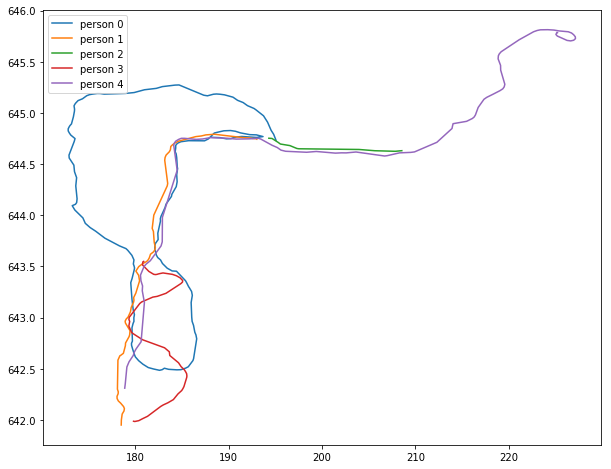

In [4]:
f = plt.figure(figsize=[10,8])
g = table_festival_tracking.groupby('object_id')
object_id = []
average_speed = []
max_speed = []
duration = []
for g_id,g_df in g:
    f = plt.plot(g_df['x-coordinates'], g_df['y-coordinates'], label = 'person {}'.format(g_id))
    object_id.append(g_id)
    average_speed.append(g_df.velocity.mean())
    max_speed.append(g_df.velocity.max())
    duration.append(sum(np.array(g_df['time'])))
f = plt.legend()

In [5]:
overall_table = pd.DataFrame()
overall_table['person'] = object_id
overall_table['duration'] = duration
overall_table['avg speed'] = average_speed
overall_table['max speed'] = max_speed

overall_table

,person,duration,avg speed,max speed
0,0,962,1.089609,2.385104
1,1,369,1.012782,2.066436
2,2,128,0.750430,1.468349
3,3,138,1.852666,4.799264
4,4,583,1.192025,2.078184


In [6]:
import umap
from sklearn.cluster import KMeans

In [7]:
table = overall_table.drop(['person'], axis=1)

embedding = umap.UMAP().fit_transform(table.values)

C:\Users\simon\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


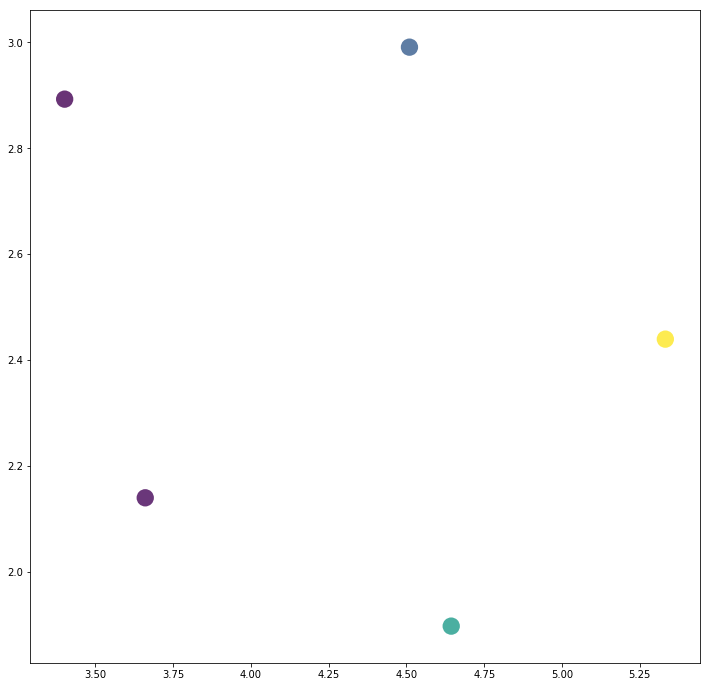

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=table.iloc[:, 0], 
            edgecolor='none', 
            alpha=0.80, 
            s=300,
            marker = 'o'
           );

In [9]:
number_of_clusters = 2

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(embedding)
kmeans.labels_

array([0, 0, 1, 1, 0])

In [10]:
overall_table['cluster'] = kmeans.labels_
overall_table

,person,duration,avg speed,max speed,cluster
0,0,962,1.089609,2.385104,0
1,1,369,1.012782,2.066436,0
2,2,128,0.750430,1.468349,1
3,3,138,1.852666,4.799264,1
4,4,583,1.192025,2.078184,0


In [11]:
for cluster_number in range(number_of_clusters):
    print('\n-------- cluster number: {} -------- \n'.format(cluster_number))
    table_frame = overall_table[overall_table['cluster']==cluster_number]
    display(table_frame)
    for column in overall_table.columns.drop(['person','cluster']):
        display('{} std: {}'.format(column, table_frame[[column]].std()[0]))   


-------- cluster number: 0 -------- 



,person,duration,avg speed,max speed,cluster
0,0,962,1.089609,2.385104,0
1,1,369,1.012782,2.066436,0
4,4,583,1.192025,2.078184,0


'duration std: 300.30151514769284'

'avg speed std: 0.08992546209094945'

'max speed std: 0.1806876093151645'


-------- cluster number: 1 -------- 



,person,duration,avg speed,max speed,cluster
2,2,128,0.750430,1.468349,1
3,3,138,1.852666,4.799264,1


'duration std: 7.0710678118654755'

'avg speed std: 0.7793986392203786'

'max speed std: 2.3553122303343446'